In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Улучшить
результаты может обогащение данных дополнительными признаками,
например, можно добавить взаимодействия (произведения) признаков
или полиномы.

Вопрос оптимальной подготовки данных для конкретного
прикладного применения известен под названием feature engineering
(конструирование признаков) и является одной из главных задач для
специалистов по машинному обучению, пытающихся решить реальные
проблемы.

# Категориальные переменные

Задача,
которую мы будем решать при работе с набором данных adult,
заключается в том, чтобы спрогнозировать наличие у работника дохода
более 50000  и менее 50000 .

## Прямое кодирование (дамми-переменные)

Наиболее распространенным способом
представления категориальных переменных является прямое
кодирование или, если перевести дословно, кодирование с одним
горячим состоянием
(one-hot-encoding или one-out-of-N encoding). 
- Идея, чтобы
заменить категориальную переменную одной или несколькими новыми
признаками, которые могут принимать значения 0 и 1. Значения 0 и 1
придают смысл формуле линейной бинарной классификации (а также
всем остальным моделям в scikit-learn) и с помощью даммипеременных мы можем выразить любое количество категорий, вводя по
одному новому признаку для каждой категории.
- Скажем, признак workclass имеет возможные значения "Government
Employee", "Private Employee", "Self Employed" и "Self Employed
Incorporated". Для того, чтобы закодировать эти четыре возможных
значения, мы создаем четыре новых характеристики "Government
Employee", "Private Employee", "Self Employed" и "Self Employed
Incorporated". Характеристика равна 1, если workclass принимает
соответствующее значение, или равна 0 в противном случае, поэтому для
каждой точки данных только одна из четырех новых характеристик будет
равна 1. Вот почему данная операция называется кодированием с одним
горячим (активным) состоянием.

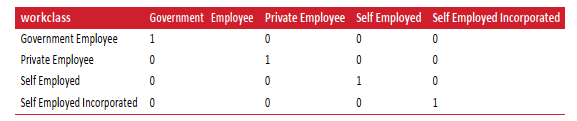

Таблица 4.2 Прямое кодирование признака workclass

In [2]:
import os
# Файл не содержит заголовков столбцов, поэтому мы передаем header=None
# и записываем имена столбцов прямо в "names
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# В целях упрощения мы выберем лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display позволяет вывести красивый вывод, отформатированный в Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


Таблица 4.1 Первые несколько записей набора данных adult

### Проверка категориальных данных, закодированных в виде строк

Прочитав набор данных, аналогичный приведенному выше, как правило,
неплохо было бы сперва проверить, содержит ли столбец на самом деле
осмысленные категориальные данные. Например, некоторые могут определить свой пол как
«мужской», а некоторые просто напишут «мужчина» и нам, возможно,
потребуется поместить эти два варианта в одну и ту же категорию.
- Хороший способ проверить содержимое столбца – воспользоваться
функцией value_counts для пандасовского типа данных Series (каждый
столбец DataFrame является структурой Series), чтобы посмотреть, что
представляют из себя уникальные значения и как часто они встречаются:

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


Видно, что в этом наборе данных пол имеет строго два значения, Male
и Female, то есть данные уже находятся в подходящем формате, чтобы
записать их, используя прямое кодирование. В реальном примере вы
должны просмотреть все столбцы и проверить их значения.

Библиотека pandas предлагает очень простой способ кодирования
данных с помощью функции get_dummies. Функция get_dummies
автоматически преобразует все столбцы, которые содержат объектные
типы (например, строки) или являются категориальными данными:

In [4]:
print("Исходные признаки:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies:\n", list(data_dummies.columns))

Исходные признаки:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
# Видно, что непрерывные признаки age и hours-per-week остались
# неизменными, тогда как для каждого возможного значения
# категориального признака были созданы новые характеристики:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Теперь мы можем воспользоваться атрибутом values, что
преобразовать пандасовский дата-фрейм data_dummies в массив NumPy,
а затем обучить на его основе модель машинного обучения.

In [6]:
# Берем только те столбцы, которые содержат признаки,
# то есть все столбцы, начиная с 'age' и заканчивая 'occupation_ Transport-moving'
# Этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Извлекаем массивы NumPy
X = features.values
y = data_dummies['income_ >50K'].values
print("форма массива X: {} форма массива y: {}".format(X.shape, y.shape))

форма массива X: (32561, 44) форма массива y: (32561,)


Теперь данные представлены в том формате, который scikit-learn
умеет обрабатывать, и мы можем продолжить построение модели в
обычном режиме:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.81


Представьте, что у нас обучающий и тестовые наборы записаны в
двух разных пандасовских дата-фреймах. Если в тестовом наборе
у признака workclass будет отсутствовать значение "Private
Employee", pandas предположит, что существуют только три
возможных значения этого признака и создаст лишь три новых
дамми-переменных. Теперь у признака workclass разное
количество дамми-переменных в обучающем и тестовом наборах
и мы уже больше не можем применить к тестовому набору модель,
построенную на обучающей выборке. Возьмем ситацию еще хуже,
представьте себе, что признак workclass принимает значения
"Government Employee" и "Private Employee" в обучающем наборе
и "Self Employed" и "Self Employed Incorporated" в тестовом
наборе. В обоих случаях pandas создаст две новые даммипеременные, таким образом перекодированные дата-фреймы
будут иметь одинаковое количество дамми-переменных. Однако
эти две дамми-переменные имеют совершенно различный смысл в
обучающем и тестовом наборах. Столбец, соответствующий значению "Government Employee" в обучающем наборе, будет
закодирован как "Self Employed" в тестовом наборе.
Модель машинного обучения, построенная на этих данных, будет
работать очень плохо, потому что исходит из того, что столбцы
соответствуют одному и тому же возможному значению
категориального признака (ведь они имеют одинаковое
расположение в массивах), тогда как на самом деле они
соответствуют совершенно разным значениям. 
- Чтобы это
исправить, вызовите функцию get_dummies и передайте ей в
качестве аргумента дата-фрейм, содержащий как обучающие, так
и тестовые данные, или уже после вызова get_dummies убедитесь в
том, что имена столбцов одинаковы для обучающего и тестовых
наборов и имеют один и тот же смысл.

## Для кодирования категорий можно использовать числа

Функция get_dummies в pandas обрабатывает все числа как
непрерывные значения и не будет создавать дамми-переменные для них.
Чтобы обойти эту проблему, вы можете либо воспользоваться
OneHotEncoder в scikit-learn (указав, какие переменные являются
непрерывными, а какие – дискретными), либо преобразовать столбцы с
числами, содержащиеся в дата-фрейме, в строки.

In [8]:
# создаем дата-фрейм с признаком, который принимает целочисленные значения,
# и категориальным признаком, у которой значения являются строками
demo_df = pd.DataFrame({'Целочисленный признак': [0, 1, 2, 1], 
                        'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


Таблица 4.4 Дата-фрейм, содержащий категориальный строковый
признак и целочисленный признак

Функция get_dummies закодирует лишь строковый признак, тогда как
целочисленный признак оставит без изменений, как это видно в таблице
4.5:

In [9]:
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Таблица 4.5 Данные таблицы 4.4, преобразованные с помощью прямого
кодирования, целочисленный признак остался без изменений

Можно явно указать столбцы, которые нужно закодировать, с помощью параметра columns:

In [10]:
demo_df['Целочисленный признак'] = demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак'])

,Категориальный признак,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2
0,socks,1,0,0
1,fox,0,1,0
2,socks,0,0,1
3,box,0,1,0


# Биннинг, дискретизация, линейные модели и деревья

Вернемся к набору
данных wave, который мы использовали для регрессионного анализа в
главе 2. Он имеет лишь один входной признак. Ниже приводится
сравнение результатов модели линейной регрессии и дерева регрессии
для этого набора данных (см. рис. 4.1):

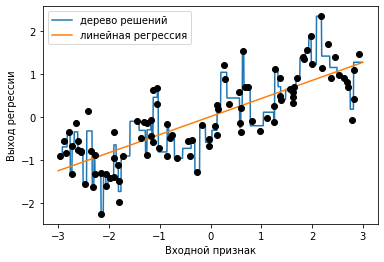

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="дерево решений")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="линейная регрессия")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

Рис. 4.1 Сравнение результатов модели линейной регрессии и дерева регрессии
для набора данных wave

Одним из способов повысить прогнозную силу линейных
моделей при работе с непрерывными данными является биннинг
характеристик (binning), также известный как дискретизация
(discretization), который разбивает исходный признак на несколько
категорий.
- Представим, что диапазон значений входного признака (в данном
случае от -3 до 3) разбит на определенное количество категорий или
бинов (bins), допустим, на 10 категорий. Точка данных будет
представлена категорией, в которую она попадает. Сначала мы должны
задать категории. В данном случае мы зададим 10 категорий, равномерно
распределенных между -3 и 3. Для этого мы используем функцию
np.linspace, создаем 11 элементов, которые дадут 10 категорий –
интервалов, ограниченных двумя границами:

In [12]:
bins = np.linspace(-3, 3, 11)
print("категории: {}".format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Далее мы записываем для каждой точки данных категорию, в которую
она попадает. Это можно легко вычислить с помощью функции
np.digitize:

In [13]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


То, что мы сделали здесь, называется преобразованием непрерывного
входного признака набора данных wave в категориальный признак. Чтобы запустить модель scikit-learn на этих данных, мы
выполним прямое кодирование этого дискретного признака с помощью
функции OneHotEncoder из модуля preprocessing. Функция
OneHotEncoder выполняет ту же самую кодировку, что и
pandas.get_dummies, хотя в настоящее время она работает только с
категориальными переменными, которые принимают целочисленные
значения:

In [14]:
from sklearn.preprocessing import OneHotEncoder
# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Поскольку мы указали 10 категорий, преобразованный набор данных
X_binned теперь состоит из 10 признаков:

In [15]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


Построим новую модель линейной регрессии и новую модель
дерева решений на основе данных, преобразованных с помощью прямого
кодирования. Результат визуализирован на рис. 4.2, также показаны
границы категорий, обозначенные вертикальными серыми линиями:

Text(0.5, 0, 'Входной признак')

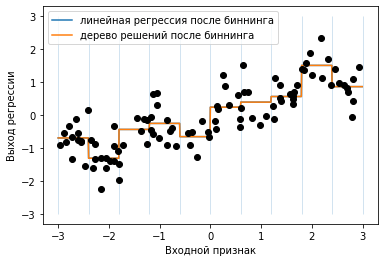

In [16]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line,
         reg.predict(line_binned),
         label='линейная регрессия после биннинга')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

Рис. 4.2 Сравнение результатов модели линейной регрессии и дерева регрессии
после проведения биннинга

Линии лежат точно поверх друг друга, это означает,
что модель линейной регрессии и дерево решений дают одинаковые
прогнозы. Для каждой категории они предсказывают одно и то же
значение (константу). Поскольку признаки принимают одно и то же
значение в пределах каждой категории, любая модель должна
предсказывать одно и то же значение для всех точек, находящихся внутри категории. Сравнив модели, обученные до и после биннинга
переменных, мы видим, что 
- линейная модель стала теперь гораздо более
гибкой, потому что теперь оно присваивает различные значения
категориям
- в то время как модель дерева решений стала существенно
менее гибкой. В целом биннинг признаков не дает положительного
эффекта для моделей на основе дерева, поскольку эти модели сами могут
научится разбивать данные по любому значению. В некотором смысле
это означает, что деревья решений могут самостоятельно осуществить
биннинг для наилучшего прогнозирования данных.

Если есть веские причины использовать линейную модель для
конкретного набора данных (например, он имеет большой объем и
является многомерным), но некоторые признаки имеют нелинейные
взаимосвязи с зависимой переменной – биннинг может быть отличным
способом увеличить прогнозную силу модели.

# Взаимодействия и полиномы

Еще один способ обогатить пространство признаков, в частности, для
линейных моделей, заключается в добавлении взаимодействий
признаков
(interaction features) и полиномиальных признаков
(polynomial features). Конструирование признаков подобного рода
получило распространение в статистическом моделировании, а также
широко используется во многих практических сферах применения
машинного обучения.

Линейные модели могут вычислить не только значения
сдвига, но и значения наклона. Один из способов добавить наклон в
линейную модель, построенную на основе категоризированных данных,
заключается в том, чтобы добавить обратно исходный признак (ось х на
графике). Это приведет к получению 11-мерного массива данных, как
показано на рис. 4.3:

In [17]:
X_combined = np.hstack([X, X_binned]) 
print(X_combined.shape)

(100, 11)


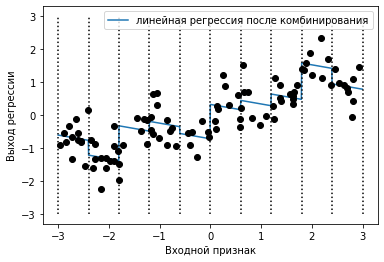

In [18]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='линейная регрессия после комбинирования')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')

Рис. 4.3 Линейная регрессия с использованием категоризированных признаков и
одним глобальным наклоном

В этом примере модель вычислила сдвиг для каждой категории, а
также наклон. Вычисленный наклон направлен вниз и он является
общим для всех категорий, так как у нас имеется толька один признак по
оси x с одним коэффициентом. 
- Поскольку наличие одного наклона для
всех категорий не очень сильно поможет с точки зрения моделирования,
мы бы хотели вычислить для каждой категории свой собственный
наклон! 
- Мы можем добиться этого, добавив взаимодействие или
произведение признаков, указывающее категорию точки данных и ее
расположение на оси х. Данный признак является произведением
индикатора категории и исходной переменной. Давайте создадим этот
набор данных:

In [19]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


Теперь набор данных содержит 20 признаков: в него записывается
индикатор категории, в которой находится точка данных, а также
произведение исходного признака и индикатора категории. Произведение признаков можно представить как отдельную копию
признака, отложенного по оси x, для каждой категории. Оно
соответствует исходному признаку, попадающему в данную категорию,
или нулю во всех остальных случаях. На рис. 4.4 показан результат
линейной модели для этого нового пространства признаков:

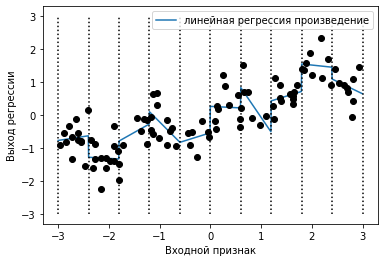

In [20]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product),
         label='линейная регрессия произведение')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

Рис. 4.4 Линейная регрессия с отдельным наклоном
для каждой категории

Теперь каждая категория имеет свое собственное значение
сдвига и свое собственное значение наклона.

- Использование биннинга – это способ увеличения пространства
входных признаков. 

Еще один способ заключается в использовании полиномов
(polynomials) исходных признаков. Для признака х мы
рассмотрим х ** 2, х ** 3, х ** 4 и так далее. Данную операцию можно
выполнить с помощью PolynomialFeatures модуля preprocessing:

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# задаем степень полинома 10:
# значение по умолчанию "include_bias=True" добавляет признак-константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

Использование в преобразовании полиномов до 10-й степени дает 10 новых признаков:

In [22]:
print("форма массива X_poly: {}".format(X_poly.shape))

форма массива X_poly: (100, 10)


Сравним элементы массива X_poly с элементами массива X:

In [23]:
print("Элементы массива X:\n{}".format(X[:5]))
print("Элементы массива X_poly:\n{}".format(X_poly[:5]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Элементы массива X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


Содержательный смысл этих признаков можно понять, вызвав
метод get_feature_names, который выведет название каждого признака:

In [24]:
print("Имена полиномиальных признаков:\n{}".format(poly.get_feature_names()))

Имена полиномиальных признаков:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Использование полиномиальных признаков в модели линейной
регрессии дает классическую модель полиномиальной регрессии
(polynomial regression), представленную на рис. 4.5:

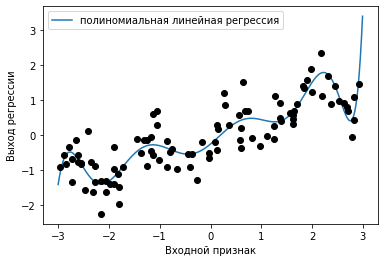

In [25]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

Рис. 4.5 Полиномиальная линейная регрессия,
использовался полином 10-й степени

Видно, что на этом одномерном наборе данных полиномиальные
признаки дают очень сглаженную подгонку. Однако полиномы высокой
степени, как правило, резко меняют направление на границах области
определения или в менее плотных областях данных.

Для сравнения ниже приводится модель ядерного SVM, обученная на
исходных данных без каких-либо преобразований (см. рис. 4.6):

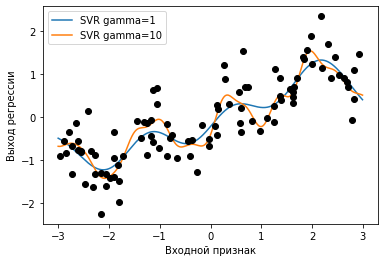

In [26]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

В качестве более реального примера, иллюстрирующего применение
взаимодействий и полиномов, давайте еще раз обратимся к набору
данных Boston Housing. Мы уже использовали полиномиальные
признаки этого набора данных в главе 2. Теперь давайте посмотрим, как
были получены эти признаки и выясним, насколько они могут помочь
нам улучшить прогноз. Сначала мы загрузим данные и отмасштабируем
их с помощью MinMaxScaler, чтобы все признаки принимали значения в
диапазоне между 0 и 1:

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    random_state=0)

# масштабируем данные
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь, мы выделим полиномиальные признаки и взаимодействия
вплоть до 2-й степени:

In [28]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("форма обучающего массива X: {}".format(X_train.shape))
print("форма обучающего массива X полиномы и взаим: {}".format(X_train_poly.shape))

форма обучающего массива X: (379, 13)
форма обучающего массива X полиномы и взаим: (379, 105)


Набор данных первоначально содержал 13 признаков, которые в ходе
преобразований превратились в 105 новых признаков. Эти новые
признаки представляют собой все возможные взаимодействия между
двумя различными исходными характеристиками, а также квадраты
исходных характеристик. 
- В данном случае degree=2 означает, что мы
рассматриваем признаки, которые являются произведением не более
двух исходных характеристик. 
- Точное соответствие между входными и
выходными признаками можно найти с помощью метода
get_feature_names:

In [29]:
print("Имена полиномиальных признаков:\n{}".format(poly.get_feature_names()))

Имена полиномиальных признаков:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


Вычислим правильность прогнозов, применив модель Ridge к
данным, включающим взаимодействия, и данным без взаимодействий:

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействий: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Правильность на тестовом наборе с взаимодействиями: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействий: 0.621
Правильность на тестовом наборе с взаимодействиями: 0.753


Очевидно, что в случае с гребневой регрессией взаимодействия и
полиномиальные признаки позволяют улучшить правильность модели.
Впрочем, применение более сложной модели типа случайного леса дает
немного другой результат:

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействий: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Правильность на тестовом наборе с взаимодействиями:{:.3f}".format(
    rf.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействий: 0.811
Правильность на тестовом наборе с взаимодействиями:0.780


# Одномерные нелинейные преобразования

- Добавление признаков, возведенных в
квадрат или куб, может улучшить линейные модели регрессии.
- Существуют и другие преобразования, которые часто оказываются
полезными в плане трансформации определенных признаков: в
частности, применение математических функций типа log, exp или sin.
- Если модели на основе дерева заботятся лишь о выстраивании признаков
в иерархию, то линейные модели и нейронные сети очень привязаны к
масштабу и распределению каждого признака, поэтому наличие
нелинейной взаимосвязи между признаком и зависимой переменной
становится проблемой для модели, особенно для регрессии. 
- Фунции log и exp позволяют скорректировать относительные шкалы переменных
таким образом, чтобы линейная модель или нейронная сеть могли лучше
обработать их.  
- Функции sin и cos могут пригодиться при
работе с данными, которые представляют собой периодические
структуры.
- Большинство моделей работают лучше, когда признаки (а если
используется регрессия, то и зависимая переменная) имеют гауссовское
распределение, то есть гистограмма каждого признака должна в
определенной степени иметь сходство с «колоколообразной кривой».
Использование преобразований типа log и ехр является банальным, но в
то же время простым и эффективным способом добиться более
симметричного распределения. 
- Наиболее характерный случай, когда
подобное преобразование может быть полезно, – обработка дискретных
данных. Под дискретными данными мы подразумеваем признаки типа
«как часто пользователь A входил в систему». Дискретные данные
никогда не бывают отрицательными и часто подчиняются конкретным
статистическим закономерностям.

In [32]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Давайте посмотрим на первые 10 элементов первого признака. Все
они являются положительными и целочисленными значениями, однако
выделить какую-то определенную структуру сложно.
Если посчитать частоту встречаемости каждого значения,
распределение значений становится более ясным:

In [33]:
print("Частоты значений:\n{}".format(np.bincount(X[:, 0])))

Частоты значений:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Значение 2, по-видимому, является наиболее распространенным, оно
встречается 68 раз (bincount всегда начинает считать с 0), а частоты
более высоких значений быстро падают. Однако есть несколько очень
высоких значений, например, 84 и 85, которые встречаются два раза. Мы
визуализируем частоты на рис. 4.7:

Text(0.5, 0, 'Значение')

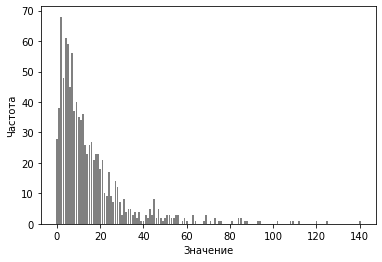

In [34]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("Частота")
plt.xlabel("Значение")

Рис. 4.7 Гистограмма значений признака X[0]

Признаки X[:, 1] и X[:, 2] имеют аналогичные свойства. Полученное
распределение значений (высокая частота встречаемости маленьких
значений и низкая частота встречаемости больших значений) является
очень распространенным явлением в реальной практике. Однако для
большинства линейных моделей оно может представлять трудность.
Давайте попробуем подогнать гребневую регрессию:

In [35]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.622


Видно, что из-за относительно низкого значения $R^2$ гребневая
регрессия не может должным образом смоделировать взаимосвязь между X и у. Впрочем, применение логарифмического преобразования может
помочь. Поскольку в данных появляется значение 0 (а логарифм 0 не
определен), мы не можем просто взять и применить log, вместо этого мы
должны вычислить log(X + 1):

In [36]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

После преобразования распределение данных стало менее
асимметричным и уже не содержит очень больших выбросов (см. рис.
4.8):

Text(0.5, 0, 'Значение')

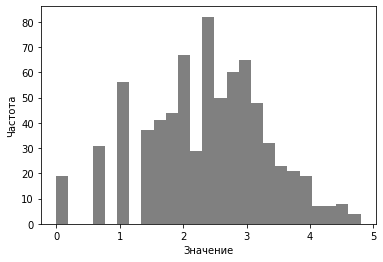

In [37]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Частота")
plt.xlabel("Значение")

Рис. 4.8 Гистограмма значений X[0] после
логарифмического преобразования

Построение модели гребневой регрессии на новых данных дает
гораздо более лучше качество подгонки:

In [38]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.875


- В этом примере все признаки имели одинаковые свойства.
Такое редко бывает на практике, и как правило, лишь некоторые
признаки нуждаются в преобразовании, либо в ряде случаев каждый
признак необходимо преобразовывать по-разному. 
- Как мы уже
упоминали ранее, эти виды преобразований не имеют значения для
моделей на основе дерева, но могут иметь важное значение для линейных
моделей. 
- Иногда при построении регрессии целесообразно преобразовать
зависимую переменную у.
- Прогнозирование частот (скажем, количества
заказов) является довольно распространенной задачей, и преобразование
log(у + 1) часто помогает.
- Как вы видели в предыдущих примерах, биннинг, полиномы и
взаимодействия могут иметь огромное влияние на качество работы
модели. Особенно это актуально для менее сложных моделей типа
линейных моделей и наивных байесовских моделей. С другой стороны,
модели на основе дерева, как правило, могут обнаружить важные
взаимодействия самостоятельно и чаще всего не требуют явного
преобразования данных. 
- Использование биннинга, взаимодействий и
полиномов в ряде случаев может положительно сказаться на работе
моделей типа SVM, ближайших соседей и нейронных сетей, однако
последствия, возникающие в результате этих преобразований,
представляются менее ясными в отличие от преобразований,
применяемых в линейных моделях.

# Автоматический отбор признаков

Чтобы узнать, насколько полезен каждый признак, существуют три
основные стратегии: 
- одномерные статистики (univariate statistics) 
- отбор на основе модели
(model-based selection) 
- итеративный отбор (iterative
selection)

Все эти методы относятся методам машинного обучения с учителем, то есть для подгонки
модели им требуется зависимая переменная. Это означает, что нам нужно
разбить данные на обучающий и тестовый наборы и осуществить отбор
признаков лишь на обучающей выборке.

## Одномерные статистики

- С помощью одномерных статистик мы определяем наличие
статистически значимой взаимосвязи между каждым признаком и
зависимой переменной. Затем отбираем признаки, сильнее всего
связанные с зависимой переменной (имеющие уровень значимости, не
превышающий заданного порогового значения). В случае классификации
эта процедура известна как дисперсионный анализ (ANOVA).
- Ключевым
свойством этих тестов является то, что они являются одномерными, то
есть они рассматривают каждую характеристику по отдельности.
- Признак будет исключен, если он становится
информативным лишь в сочетании с другим признаком. Как правило,
одномерные тесты очень быстро вычисляются и не требуют построения
модели. С другой стороны, они являются полностью независимыми от
модели, которой вы, возможно, захотите применить после отбора
признаков.

- Чтобы осуществить одномерный отбор признаков в scikit-learn, вам
нужно выбрать тест, обычно либо f_classif (по умолчанию) для
классификации или f_regression для регрессии, а также метод
исключения признаков, основанный на р-значениях, вычисленных в ходе
теста. 
- Все методы исключения параметров используют пороговое
значение, чтобы исключить все признаки со слишком высоким р-значением (высокое p-значение указывает на то, что признак вряд ли
связан с зависимой переменной). 
- Методы отличаются способами
вычисления этого порогового значения, самым простым из которых
являются SelectKB, выбирающий фиксированное число k признаков, и
SelectPercentile, выбирающий фиксированный процент признаков.

Применим отбор признаков для классификационной задачи к
набору данных cancer. Чтобы немного усложнить задачу, мы добавим к
данным некоторые неинформативные шумовые признаки. Мы
предполагаем, что отбор признаков сможет определить
неинформативные признаки и удалит их:

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (284, 80)
форма массива X_train_selected: (284, 40)


In [40]:
noise.shape

(569, 50)

In [41]:
X_w_noise.shape

(569, 80)

Как видно, количество признаков уменьшилось с 80 до 40 (на 50% от
исходного количества признаков). Мы можем выяснить, какие функции
были отобраны, воспользовавшись методом get_support, который
возвращает булевы значения для каждого признака (визуализированы на
рис. 4.9):

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Индекс примера')

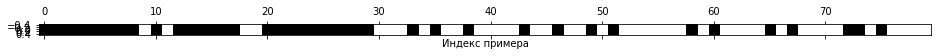

In [42]:
mask = select.get_support()
print(mask)
# визуализируем булевы значения: черный – True(их взяли),
# белый – False(их удалили)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

Рис. 4.9 Признаки, отобранные с помощью SelectPercentile

Благодаря визуализации видно, что большинство отобранных
признаков являются исходными характеристиками, а большинство
шумовых признаков были удалены. Тем не менее восстановление
исходных признаков далеко от идеала.

Сравним правильность
логистической регрессии с использованием всех признаков с правильностью логистической регрессии, использующей лишь
отобранные признаки:

In [43]:
from sklearn.linear_model import LogisticRegression

# преобразовываем тестовые данные
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.951
Правильность только с отобранными признаками: 0.933


В данном случае удаление шумовых признаков понизило правильность. результаты, получающиеся на реальных данных, как правило, получаются
смешанными. Однако одномерный отбор признаков может быть очень
полезен, если их количество является настолько большим, что
невозможно построить модель, используя все эти характеристики, или
же вы подозреваете, что многие характеристики совершенно
неинформативны.

## Отбор признаков на основе модели

- Отбор признаков на основе модели использует модель машинного
обучения с учителем, чтобы вычислить важность каждого признака, и
оставляет только самые важные из них. 
- Модель машинного обучения с
учителем, которая используется для отбора признаков, не должна
использоваться для построения итоговой модели. 
- Модель,
применяющаяся для отбора признаков, требует вычисления
определенного показателя важности для всех признаков, с тем чтобы
характеристики можно было ранжировать по этой метрике. 
- В деревьях
решений и моделях на основе дерева решений такой показатель
реализован с помощью атрибута feature_importances_, в котором
записывается важность каждого признака.
- У линейных моделей есть
коэффициенты, абсолютные значения которых также можно
использовать для оценки важности признаков. 
- Кроме того, эту процедуру можно использовать в качестве инструмента
предварительной обработки, позволяющего отобрать признаки для
другой модели. 
- В отличие от одномерного отбора отбор на основе модели
рассматривает все признаки сразу и поэтому может обнаружить
взаимодействия (если модель способна выявить их). Чтобы применить
отбор на основе модели, мы должны воспользоваться модификатором
SelectFromModel:

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

Класс SelectFromModel отбирает все признаки, у которых показатель
важности (заданный моделью машинного обучения с учителем)
превышает установленное пороговое значение. Чтобы вычислить
результат, сопоставимый с тем, который мы получили при
однофакторном отборе признаков, мы использовали в качестве
порогового значения медиану, поэтому будет отобрана половина
признаков. Мы используем случайный лес на основе деревьев
классификации (100 деревьев), чтобы вычислить важности признаков.
Это довольно сложная модель, обладающая гораздо большей прогнозной
силой, нежели одномерные тесты. Теперь давайте подгоним эту модель:

In [45]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X c l1: {}".format(X_train_l1.shape))

форма обуч набора X: (284, 80)
форма обуч набора X c l1: (284, 40)


Визуализируем:

Text(0.5, 0, 'Индекс примера')

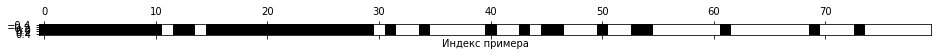

In [46]:
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

Рис. 4.10 Признаки, отобранные SelectFromModel с помощью
RandomForestClassifier

На этот раз были отобраны все исходные признаки, кроме двух.
Поскольку мы задали отбор лишь 40 признаков, некоторые шумовые
признаки также будут выбраны. Давайте посмотрим на правильность:

In [47]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.947


Использовав более оптимальный отбор признаков, мы смогли
немного улучшить прогноз.

## Итеративный отбор признаков

В итеративном отборе признаков строится
последовательность моделей с различным количеством признаков.
Существует два основных метода:
- Первый метод начинается шага, когда
в модель включена лишь одна константа (входных признаков нет) и
затем добавляет признак за признаком до тех пор, пока не будет
достигнут критерий остановки
- Второй метод начинается с шага, когда
все признаки включены в модель, и затем начинает удалять признак за
признаком, пока не будет достигнут критерий остановки.

Поскольку строится последовательность моделей, эти методы с вычислительной
точки зрения являются гораздо более затратными в отличие от ранее
обсуждавшихся методов. Одним из таких методов является метод
рекурсивного исключения признаков (recursive feature elimination, RFE),
который начинается с включения всех признаков, строит модель и
исключает наименее важный признак с точки зрения модели. Затем
строится новая модель с использованием всех признаков, кроме
исключенного, и так далее, пока не останется лишь заранее определенное
количество признаков. Чтобы все получилось, модели, используемой для
отбора признаков, необходима определенная метрика, измеряющая
важность признаков, как было в случае с модельным отбором. Здесь мы
воспользуемся той же самой моделью случайного леса, которую
применяли ранее, и получим результаты, показанные на рис. 4.11:

Text(0.5, 0, 'Индекс примера')

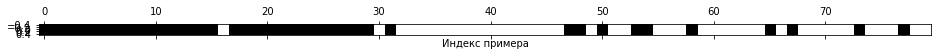

In [48]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
             n_features_to_select=40)

select.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

Рис. 4.11 Признаки, отобранные методом рекурсивного исключения признаков с
помощью RandomForestClassifier

Отбор признаков стал лучше по сравнению с одномерным отбором и
отбором на основе модели, однако одного признака по-прежнему не
хватает. Кроме того, выполнение этого программного кода занимает
значительно больше времени в отличие от модельного отбора, поскольку
модель случайного леса обучается 40 раз, по одной итерации для каждого
отбрасываемого признака. Давайте проверим правильность модели
логистической регрессии c использованием RFE для отбора признаков:

In [49]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.940


Кроме того, мы можем применить модель, использованную внутри
РСЕ, чтобы вычислить прогнозы. Она использует лишь набор
отобранных признаков:

In [50]:
print("Правильность на тестовом наборе: {:.3f}".format(select.score(X_test, y_test)))

Правильность на тестовом наборе: 0.951


- Если у вас нет уверенности в том, какие признаки использовать в
качестве входных данных для вашего алгоритма машинного обучения,
автоматический отбор признаков может быть весьма полезен.
- Кроме того,
он отлично подходит для уменьшения количества необходимых
признаков, например, чтобы увеличить скорость вычисления прогнозов
или получить более интерпретируемые модели.
- В большинстве реальных
примеров применение отбора признаков вряд ли обеспечит большой
прирост производительности. Тем не менее, он по-прежнему является
ценным инструментом в арсенале специалиста по анализу данных.

# Применение экспертных знаний

Стоимость авиарейсов, как правило, становится выше в месяцы,
приходящиеся на период отпусков, и в праздничные дни. Хотя даты
некоторых праздников (например, Рождество) фиксированы, и поэтому
их эффект можно учесть, исходя из даты, другие могут зависеть от фазы
луны (например, Ханука и Пасха) или устанавливаться органами власти
(например, каникулы). Эти события нельзя извлечь из данных, если
каждый рейс записывается только с помощью (григорианской) даты.
- Однако легко добавить признак, который будет фиксировать день полета
как предшествующий дню государственного праздника/дню объявления
школьных каникул или следующий после дня государственного
праздника/дня объявления школьных каникул. Таким образом,
априорное знание можно закодировать в признаки, чтобы помочь
алгоритму машинного обучения. Добавление признака не означает его
обязательное использование алгоритмом машинного обучения и даже
если информация о празднике окажется малоинформативной с точки
зрения прогнозирования цен на авиарейсы, обогащение данных этим
признаком не принесет вреда.

Загрузим данные за август 2015 года для этой конкретной
станции в виде пандасовского DataFrame. Мы разбили данные на 3-
часовые интервалы, чтобы выделить основные тренды для каждого дня:

In [51]:
def load_citibike():
    data_mine = pd.read_csv("citibike.csv")
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one
citibike = load_citibike()

In [52]:
print("данные Citi Bike:\n{}".format(citibike.head()))

данные Citi Bike:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Следующий пример показывает количество велосипедов, взятых в
прокат, по дням месяца (рис. 4.12):

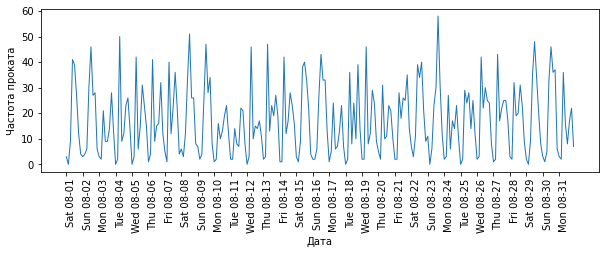

In [53]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Дата")
plt.ylabel("Частота проката");

Рис. 4.12 Количество велосипедов, взятых на прокат
в течение месяца для определенной станции

Решая задачу
прогнозирования для временных рядов, мы учимся на прошлом и делаем
прогноз на будущее. Это означает, что при разбиении данных на
обучающий и тестовый наборы, нам нужно взять все данные до
определенной даты в качестве обучающей выборки и все данные после
этой даты в качестве тестовой выборки. Вот как мы обычно используем
прогнозирование временных рядов: обладая информацией о прокате
велосипедов в прошлом, мы строим предположения о том, что
произойдет завтра. Мы используем первые 184 точки данных,
соответствующие первым 23 дням, в качестве обучающего набора, а
остальные 64 точки данных, соответствующие оставшимся 8 дням, в
качестве тестового набора.

Широко распространенный способ хранения дат на компьютерах –
использование POSIX-времени, которое представляет собой количество
секунд, прошедших с полуночи (00:00:00) 1 января 1970 года (оно же
является точкой отсчета Unix-времени). В качестве первой попытки мы
можем воспользоваться им для нашего представления дат:

In [54]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_4612/2225363848.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9


Сначала мы зададим функцию, чтобы разбить данные на обучающий
и тестовый наборы, построим модель и визуализируем результат:

In [55]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Ранее мы уже видели, что случайный лес требует очень
незначительной предварительной обработки данных, что, по-видимому,
делает его оптимальной моделью для старта. Мы передаем функции
eval_on_features массив с признаком X (даты, преобразованные в
POSIX-формат), y и модель случайного леса. Рис. 4.13 показывает
результат:

Test-set R^2: -0.04


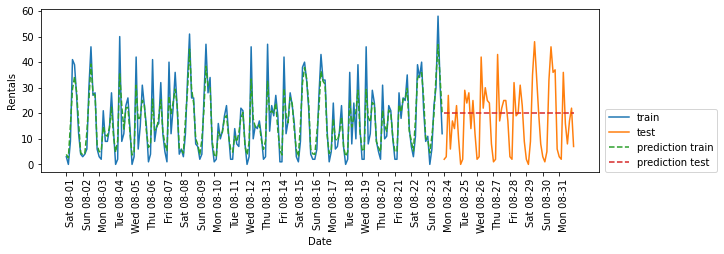

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Рис. 4.13 Прогнозы, вычисленные случайным лесом
(использовались даты, пребразованные в формат времени POSIX)

- Как это обычно бывает при построении случайного леса,
правильность прогнозов на обучающем наборе получилась довольно
высокой. Однако для тестового набора прогнозируется ровная линия.
Значение R2 равно -0.04, это означает, что наша модель ничему не
научилась. 
- Проблема обусловлена сочетанием типа нашего признака и
используемого метода (в данном случае случайного леса). Значения
признака на основе POSIX-времени для тестового набора находятся вне
диапазона значений этого признака в обучающей выборке: точки
тестового набора в отличие от точек обучающего набора имеют более
поздние временные метки. Дерево, а следовательно и случайный лес не
могут экстраполировать (extrapolate) значения признаков, лежащие вне
диапазона значений обучающих данных.
- Итог – модель просто предсказывает значение зависимой переменной для ближайшей точки
обучающего набора (для последней временной метки, которую она
запомнила).

Ясно, что мы можем улучшить прогноз. Это тот момент, когда на
помощь приходят наши «экспертные знания». Взглянув на то, как
меняется частота проката в обучающих данных, можно выделить два
очень важных фактора: 
- время суток 
- день недели

Итак, давайте добавим
эти два признака. Мы не смогли построить модель, используя время в
формате POSIX, поэтому мы отбрасываем этот признак. Для начала
давайте попробуем время суток. Как показывает рис. 4.14, теперь
прогнозы имеют одинаковую структуру для каждого дня недели:

Test-set R^2: 0.60


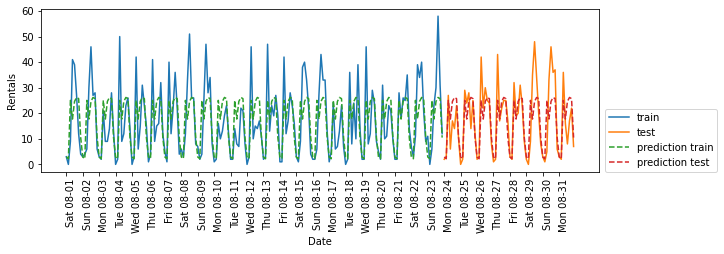

In [57]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Рис. 4.14 Прогнозы, вычисленные случайным лесом
(использовалось время суток)

Значение R2 стало уже намного лучше, но прогнозы явно не
учитывают эффект, обусловленный днем недели. Теперь давайте еще
добавим день недели (см. рис. 4.15):

Test-set R^2: 0.84


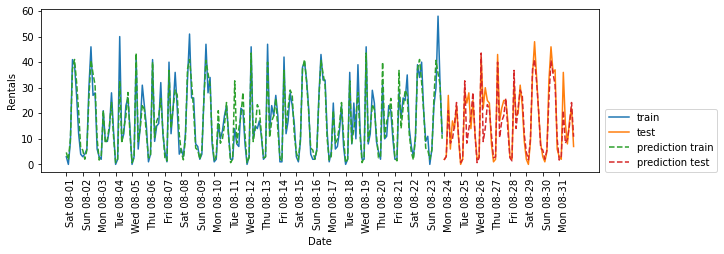

In [58]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Рис. 4.15 Прогнозы, вычисленные случайным лесом
(использовались день недели и время суток)

Теперь у нас есть модель, которая отражает периодичность поведения,
учитывая день недели и время суток. Она имеет значение R2, равное 0.84,
и демонстрирует довольно хорошую прогностическую способность.
Модель научилась прогнозировать среднее количество арендованных
велосипедов для каждой комбинации дня недели и времени суток на
основе выборки, включающей первые 23 дня августа. 

На самом деле эта
задача не требует такой сложной модели, как случайный лес, поэтому
давайте попробуем более простую модель, например, LinearRegression
(см. рис. 4.16):

Test-set R^2: 0.13


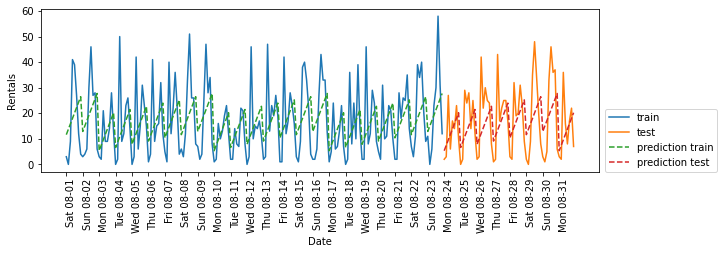

In [59]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Рис. 4.16 Прогнозы, вычисленные линейной регрессией
(использовались день недели и время суток)

LinearRegression работает гораздо хуже, а периодическая структура
данных выглядит странно. Причиной этого является тот факт, что мы
закодировали день недели и время суток с помощью целочисленных значений и теперь эти характеристики интерпретируются как
непрерывные переменные. В силу этого линейная модель может
построить лишь линейную функцию от времени суток – в более позднее
время суток наблюдается большее количество арендованных
велосипедов. Однако структура данных сложнее, чем предполагает
модель. Мы можем учесть это, преобразовав признаки, закодированные
целыми числами, в дамми-переменные с помощью OneHotEncoder (см.
рис. 4.17):

In [60]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


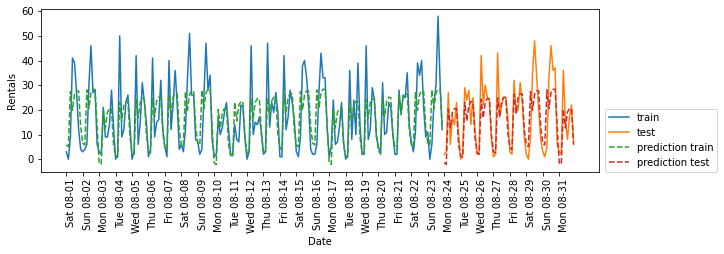

In [61]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Рис. 4.17 Прогнозы, вычисленные линейной регрессией
(использовалось прямое кодирование времени суток и дня недели)

Данная процедура дает гораздо лучший результат в отличие от
кодирования наших признаков в виде непрерывных переменных. Теперь
линейная модель вычисляет один коэффициент для каждого дня недели
и один коэффициент для каждого времени суток. Тем не менее, это
означает, что паттерн «времени суток» распределяется по всем дням
недели.

Используя взаимодействия, мы можем вычислить коэффициент для
каждой комбинации дня недели и времени суток (см. рис. 4.18):

Test-set R^2: 0.85


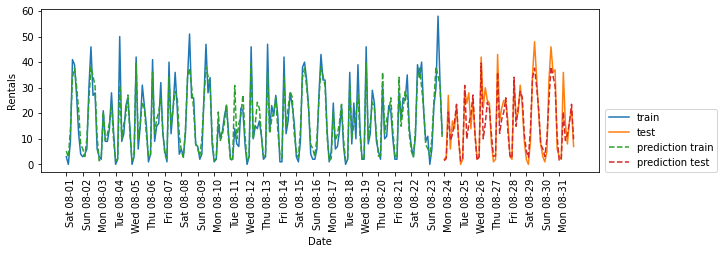

In [62]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Рис. 4.18 Прогнозы, вычисленные линейной регрессией
(использовались взаимодействия дня недели и времени суток)

Наконец, это преобразование дает модель, которая обладает такой же
высокой прогностической способностью, что и случайный лес. Большим
преимуществом данной модели является ее понятность: мы вычисляем
по одному коэффициенту для каждой комбинации дня недели и времени
суток. Мы можем просто построить график коэффициентов,
вычисленных с помощью модели, что было бы невозможно для
случайного леса.

Во-первых, мы создаем имена для наших признаков:

In [63]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

Затем мы присваиваем имена всем взаимодействиям, извлеченным с
помощью PolynomialFeatures, используя метод get_feature_names, и
сохраняем лишь те признаки, у которых коэффициенты отличны от нуля:

In [64]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Теперь мы можем визуализировать коэффициенты, извлеченные с
линейной модели (показаны на рис. 4.19):

Text(0, 0.5, 'Признак')

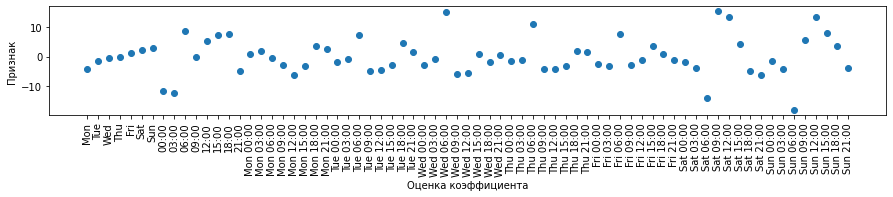

In [65]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Оценка коэффициента")
plt.ylabel("Признак")

- В этой главе мы рассмотрели способы обработки различных типов
данных (в частности, обработку категориальных переменных).
- Создание новых признаков с помощью биннинга, добавления
полиномов и взаимодействий может значительно улучшить качество
линейных моделей, тогда как более сложные, нелинейные модели типа
случайного леса и SVM могут решать более трудные задачи без явного
расширения пространства признаков.
- На практике наличие признаков,
подходящих для использования (а также их соответствие применяемой
модели), часто является самым важным элементом, обеспечивающим
хорошую работу методов машинного обучения.